In [47]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [48]:
df = pd.read_csv('911.csv')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [50]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [51]:
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [52]:
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [53]:
df['title'].nunique()

148

In [54]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: Reason, Length: 663522, dtype: object

In [55]:
 df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

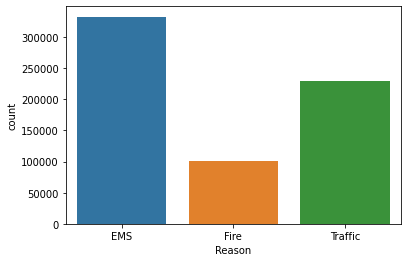

In [56]:
sns.countplot(x='Reason',data=df)

In [57]:
type(df['timeStamp'].iloc[0])

str

In [58]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [59]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [60]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [61]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'San'}
df['Day of Week'] = df['Day of Week'].map(dmap)

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

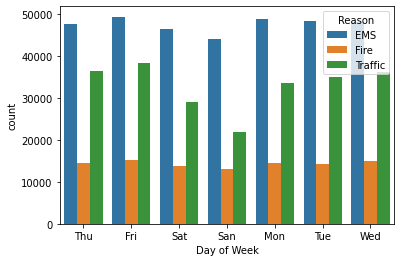

In [62]:
sns.countplot(x='Day of Week',data=df,hue='Reason')
# plt.legend(bbox_to_anchor=(1.05, 1),loc=2,borderaxespad=0.1)

In [66]:
byMonth = df.groupby('Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509
6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034
7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213


<AxesSubplot:xlabel='Month'>

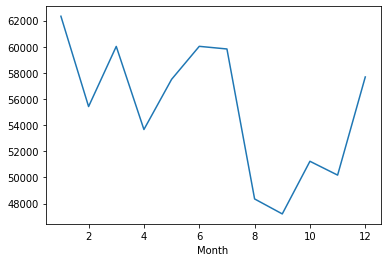

In [67]:
byMonth['lat'].plot()

<AxesSubplot:xlabel='Month', ylabel='count'>

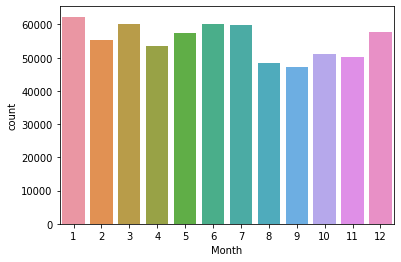

In [69]:
sns.countplot(x='Month',data=df)

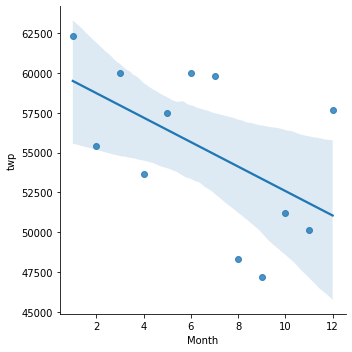

In [72]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [73]:
df['Date'] = df['timeStamp'].apply(lambda t : t.date())

In [74]:
df.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444


<AxesSubplot:xlabel='Date'>

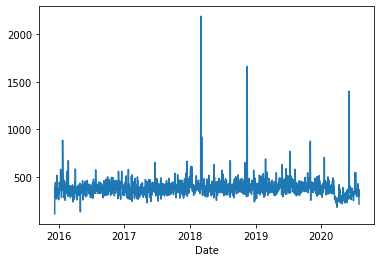

In [79]:
df.groupby('Date').count()['lat'].plot()

In [84]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

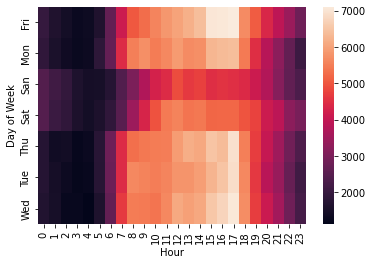

In [86]:
sns.heatmap(dayHour)